# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import seaborn as sns
import os

# Configuration

In [2]:
# path to the CSV file containing the scores of the models from `test_all_models.py` script
PATH_MODEL_SCORES = os.path.join("..", "scores", "models_scores.csv") 

# Get Data

The function `get_all_scores` reads a CSV file containing model scores and returns a DataFrame with the scores. It also performs some data preprocessing, such as replacing a specific string pattern and converting a column from strings to lists.

In [3]:
def get_all_scores(path: str = PATH_MODEL_SCORES) -> pd.DataFrame:
    """
    Read a CSV file and return a DataFrame with the model scores.

    Args:
        path (str): path to the CSV file

    Returns:
        df (pd.DataFrame): DataFrame containing the model scores
    """
    # read csv file
    df = pd.read_csv(path)

    # replace 'sentence-transformers/' with an empty string to improve readability of model names
    df['model'] = df['model'].str.replace('sentence-transformers/', '', regex=False)
    
    # convert strings in 'scores_epochs' column into lists
    df['scores_epochs'] = df['scores_epochs'].apply(ast.literal_eval)
    
    return df

**Complete data**

Dataframe with all the data/scores for each run with each model.

In [4]:
# get dataframe with all model scores
df_complete = get_all_scores(path=PATH_MODEL_SCORES)

df_complete.head()

,date,model,training_score,evaluation_score,training_time,scores_epochs,data_size,label,epochs,warmup_steps,scheduler
0,2023-07-16 17:11:51.716237,all-mpnet-base-v2,0.608311,0.591944,1415.340697,"[0.5594054151375646, 0.5807830994706884, 0.601...",10000,similarity_cosine,20,800,warmupLinear
1,2023-07-16 17:20:52.136757,all-MiniLM-L6-v2,0.514604,0.538533,536.283003,"[0.3718338417071065, 0.4770479237904018, 0.504...",10000,similarity_cosine,20,800,warmupLinear
2,2023-07-16 17:44:37.651420,multi-qa-mpnet-base-dot-v1,0.622561,0.634182,1417.679418,"[0.5479365220051019, 0.5649107693170882, 0.561...",10000,similarity_cosine,20,800,warmupLinear
3,2023-07-16 18:00:29.782185,all-distilroberta-v1,0.531745,0.527682,946.597199,"[0.4512371297412983, 0.4973934530834557, 0.499...",10000,similarity_cosine,20,800,warmupLinear
4,2023-07-16 18:15:17.787097,all-MiniLM-L12-v2,0.547777,0.561647,882.256556,"[0.4382171692649944, 0.5134079997838381, 0.542...",10000,similarity_cosine,20,800,warmupLinear


**Exact Score**

Dataframe with selected values from a single run of each model so that we can analyze and compare with the exact scores obtained in a training. Here we select the run/score that used the most data for testing (i.e. the run with the highest `data_size`).

In [5]:
# select values from a single run of each model with the largest data size (i.e. the last epoch)
# by sorting the dataframe by 'data_size' column in descending order and dropping duplicates
df = get_all_scores().sort_values('data_size', ascending=False).drop_duplicates('model').reset_index(drop=True)

df.head()

,date,model,training_score,evaluation_score,training_time,scores_epochs,data_size,label,epochs,warmup_steps,scheduler
0,2023-07-19 13:43:09.568915,distiluse-base-multilingual-cased-v2,0.657027,0.656760,19816.525348,"[0.5405765987276792, 0.5679479015329334, 0.587...",100000,similarity_cosine,20,8000,warmupLinear
1,2023-07-18 15:44:24.148504,paraphrase-multilingual-MiniLM-L12-v2,0.678793,0.675173,10538.644954,"[0.5359621357216315, 0.5836726374291709, 0.618...",100000,similarity_cosine,20,8000,warmupLinear
2,2023-07-18 02:06:05.932544,all-mpnet-base-v2,0.755561,0.757467,14384.497316,"[0.6503145271667268, 0.6852684472794293, 0.685...",100000,similarity_cosine,20,8000,warmupLinear
3,2023-07-18 07:37:33.710530,multi-qa-mpnet-base-dot-v1,0.760355,0.755933,14400.323704,"[0.6563743584431336, 0.6820532027021005, 0.700...",100000,similarity_cosine,20,8000,warmupLinear
4,2023-07-18 10:19:35.044075,all-distilroberta-v1,0.712789,0.714891,9677.286508,"[0.5923424835281076, 0.6391976662779868, 0.660...",100000,similarity_cosine,20,8000,warmupLinear


**Mean scores**

Dataframe with mean scores for each model, calculated by averaging multiple runs. In this way, we can compare the models by their mean scores for a more accurate comparison.

In [6]:
# calculate the mean of the scores for each model by grouping the dataframe by 'model' column and aggregating the scores, training time and data size
df_mean = get_all_scores().groupby('model')[['training_score', 'evaluation_score', 'training_time', 'data_size']].mean().reset_index()

df_mean.head()

,model,training_score,evaluation_score,training_time,data_size
0,all-MiniLM-L12-v2,0.641763,0.636174,3984.678417,45000.0
1,all-MiniLM-L6-v2,0.622566,0.620332,2798.221529,45000.0
2,all-distilroberta-v1,0.632706,0.620596,4357.426019,45000.0
3,all-mpnet-base-v2,0.690474,0.677543,8522.081301,45000.0
4,distiluse-base-multilingual-cased-v1,0.558318,0.553888,8346.583896,45000.0


# Bar plots on mean scores

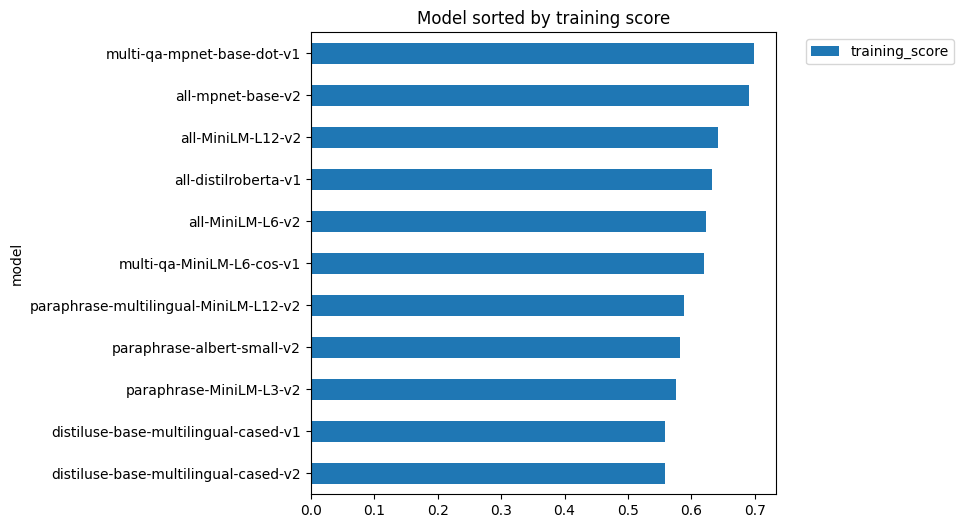

In [7]:
# plot the training_score and sort by training_score
df_plot = df_mean.sort_values(by='training_score', ascending=True)
df_plot.plot(x='model', y='training_score', kind='barh', figsize=(6, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Model sorted by training score')
plt.show()

Compare the models based on their training scores. The models are sorted by their training scores in ascending order.

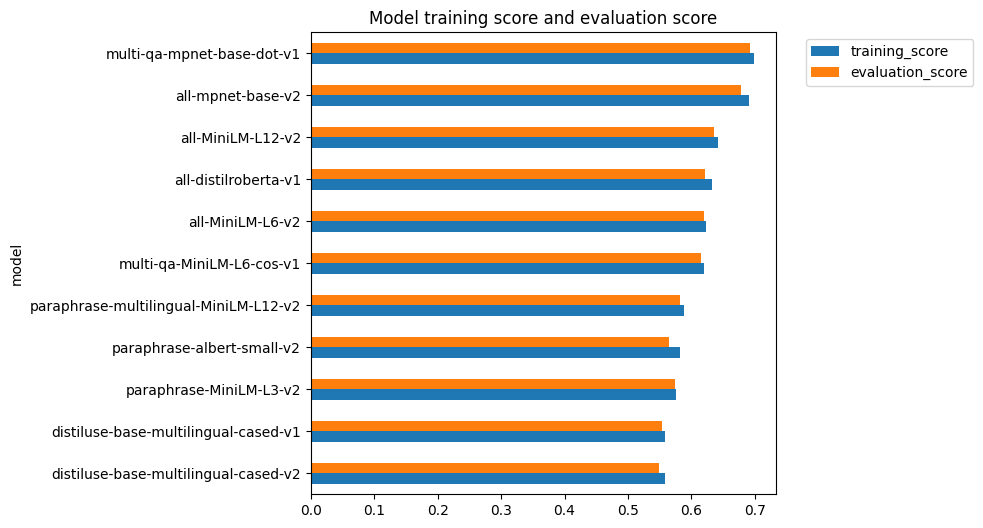

In [8]:
# plot model training_score and evaluation training_score
df_plot = df_mean.sort_values(by='training_score', ascending=True)
df_plot.plot(x='model', y=['training_score', 'evaluation_score'], kind='barh', figsize=(6, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Model training score and evaluation score')
plt.show()

Compare the models based on both their training scores and evaluation scores. The models are sorted by their training scores in ascending order.

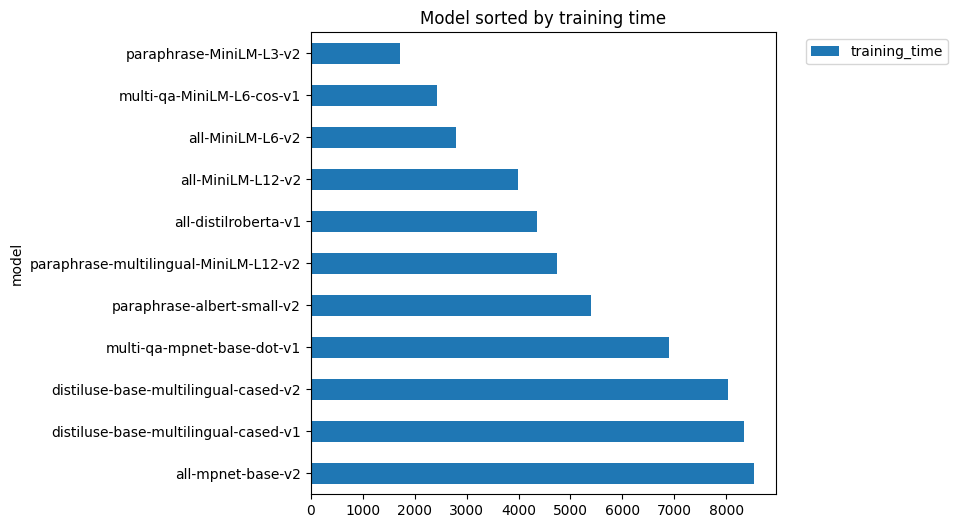

In [9]:
# compare models by training time
df_plot = df_mean.sort_values(by='training_time', ascending=False)
df_plot.plot(x='model', y=[ 'training_time'], kind='barh', figsize=(6, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Model sorted by training time')
plt.show()

Compare the models based on their training times. The models are sorted by their training times in descending order.

# Score comparison on different datas sizes

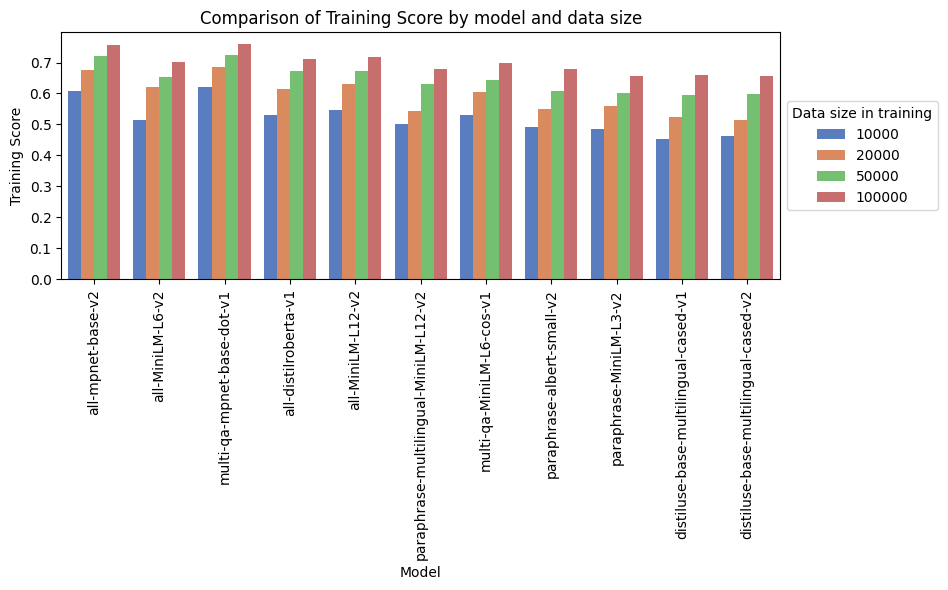

In [10]:
# comparaison of training score by model and data size
plt.figure(figsize=(8, 6))
sns.barplot(x='model', y='training_score', hue='data_size', data=df_complete, errorbar=None, palette='muted')
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Training Score')
plt.title('Comparison of Training Score by model and data size')
plt.tight_layout()

# place legend outside of the plot
plt.legend(title='Data size in training', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Compare the training scores of different models on various data sizes. Each model is represented with a different color, and the data sizes are distinguished by the hue.

# Compare models by score and time

In [11]:
def plot_model_comparison(df: pd.DataFrame, color_dict: dict) -> None:
    """
    Plot a comparison graph for model scores. It takes a DataFrame with model scores and 
    a color dictionary as inputs to color the bars.
    
    Args :
        df (DataFrame): dataframe with the model scores
        color_dict (dict): dictionary with the colors for each model
    """

    # figure with two subplots (1 row, 2 columns)
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    fig.suptitle('Model comparison', fontsize=14)

    # plot the training_score and sort by training_score
    df_plot = df.sort_values(by='training_score', ascending=True)
    axs[0].barh(df_plot['model'], df_plot['training_score'], color=[color_dict[i] for i in df_plot['model']])
    axs[0].set_title('Model sorted by training score')

    # compare models by training time
    df_plot = df.sort_values(by='training_time', ascending=False)
    axs[1].barh(df_plot['model'], df_plot['training_time'], color=[color_dict[i] for i in df_plot['model']])
    axs[1].set_title('Model sorted by training time')

    # adjust subplots so they do not overlap
    plt.tight_layout()  
    plt.show()

Create a color dictionary for better visualization:

In [12]:
# get unique models
unique_models = df_mean['model'].unique()
# create a color palette
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_models)))
# create a dictionary with the colors for each model
color_dict = dict(zip(unique_models, colors))

## Mean scores

Comparison for mean model scores.

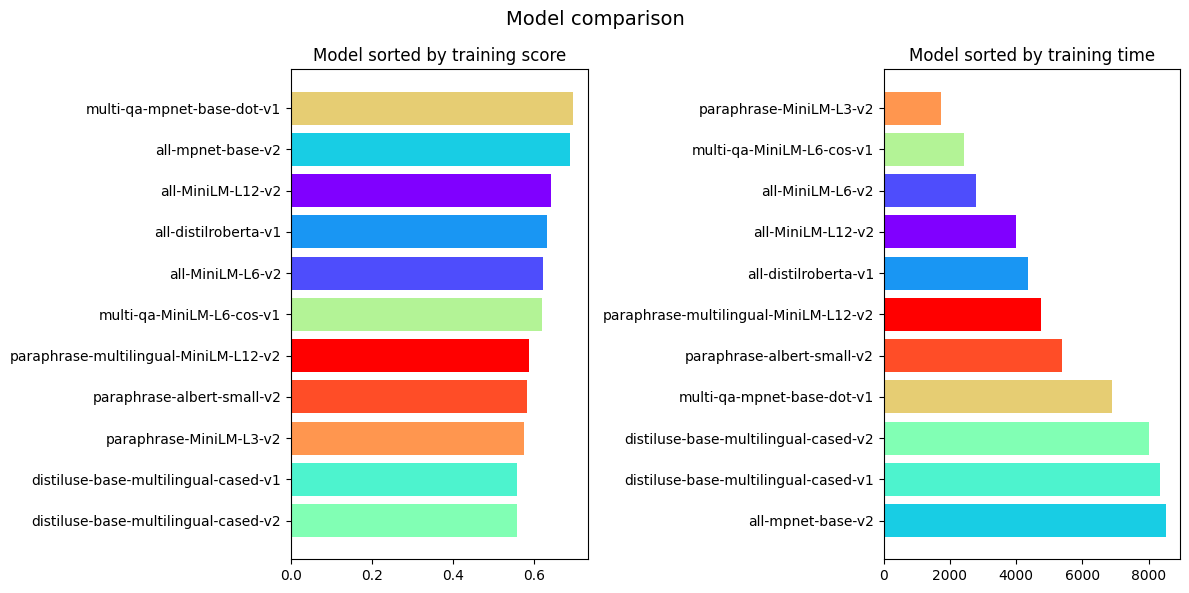

In [13]:
# plot the comparison graph for mean model scores
plot_model_comparison(df_mean, color_dict)

## Exact scores

Comparison for exact model scores.

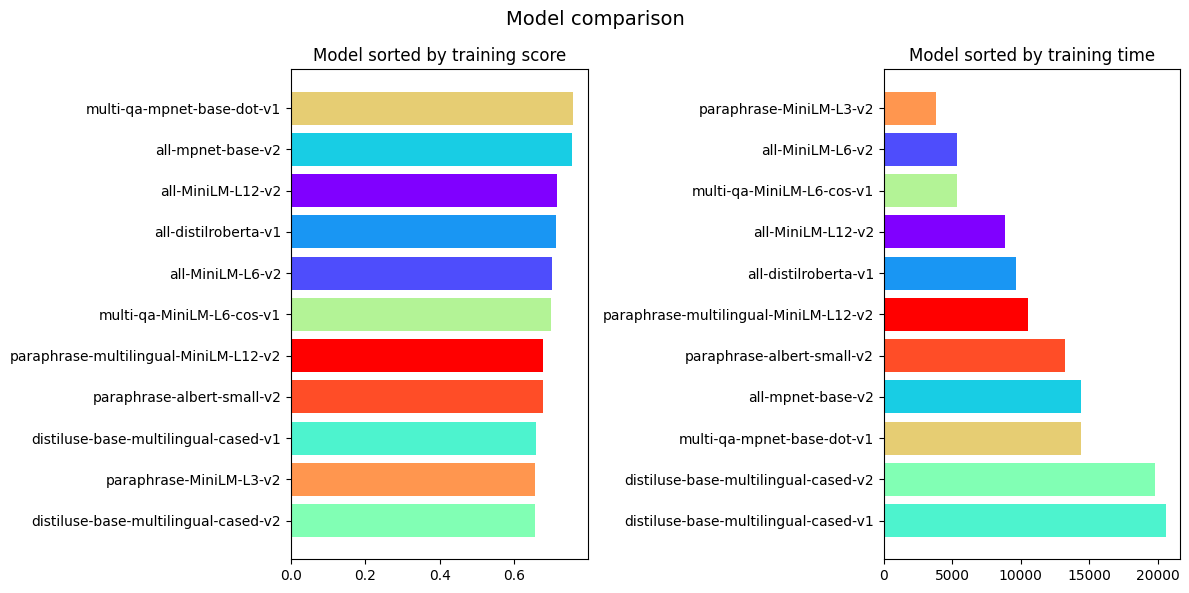

In [14]:
plot_model_comparison(df, color_dict)

The models with the best ratio between score and time are identified as:
- **all-MiniLM-L6-v2**
- all-MiniLM-L12-v2
- multi-qa-MiniLM-L6-cos-v1

# Evolution of the score over time (epochs)

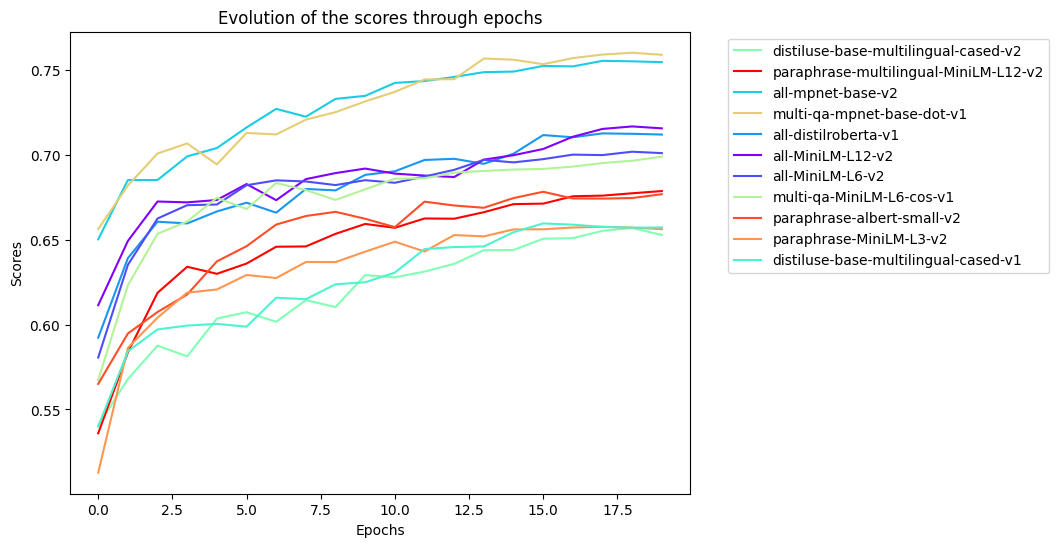

In [15]:
# create a new figure
plt.figure(figsize=(8, 6))

# loop through each row of the DataFrame
for index, row in df.iterrows():
    # get the scores and plot them
    scores = row['scores_epochs']
    plt.plot(scores, color=color_dict[row['model']], label=row['model'])

# show the legend and the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.title('Evolution of the scores through epochs')
plt.show()


Visualize the evolution of scores over epochs for each model. Each model is represented by a different color.

# Single model statistics

A specific model is selected for further analysis.

Choose a model to analyze:
- *all-MiniLM-L6-v2* 
- *all-mpnet-base-v2* 
- *multi-qa-mpnet-base-dot-v1*
- *all-distilroberta-v1*
- *all-MiniLM-L12-v2*
- *paraphrase-multilingual-MiniLM-L12-v2*
- *multi-qa-MiniLM-L6-cos-v1*
- *multi-qa-mpnet-base-dot-v1*
- *paraphrase-multilingual-mpnet-base-v2*
- *paraphrase-albert-small-v2*
- *paraphrase-MiniLM-L3-v2*
- *distiluse-base-multilingual-cased-v1*
- *distiluse-base-multilingual-cased-v2*

In [16]:
# model name to plot in detail
MODEL_NAME = 'all-MiniLM-L6-v2' 

In [17]:
df_model = df[df['model'] == MODEL_NAME]
df_model

,date,model,training_score,evaluation_score,training_time,scores_epochs,data_size,label,epochs,warmup_steps,scheduler
6,2023-07-18 03:36:26.308001,all-MiniLM-L6-v2,0.701989,0.704135,5384.294758,"[0.5806363438761462, 0.6352593440912946, 0.662...",100000,similarity_cosine,20,8000,warmupLinear


## Evolution of the score over time (epochs)

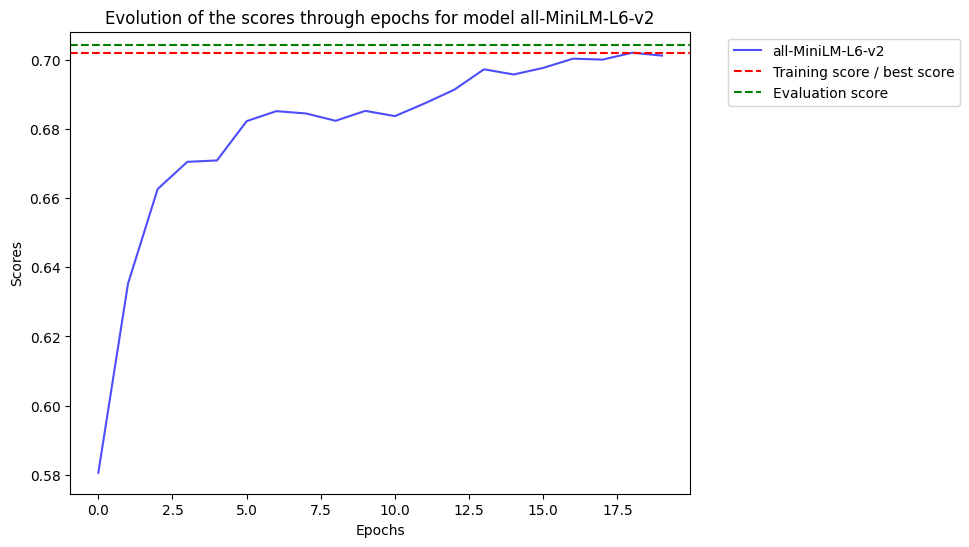

In [18]:
# plot scores through epochs
plt.figure(figsize=(8, 6))
# values[0] because we have only one row in the dataframe
plt.plot(df_model['scores_epochs'].values[0], color=color_dict[MODEL_NAME], label=MODEL_NAME)
plt.axhline(y=df_model['training_score'].values[0], color='r', linestyle='--', label='Training score / best score')
plt.axhline(y=df_model['evaluation_score'].values[0], color='g', linestyle='--', label='Evaluation score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.title('Evolution of the scores through epochs for model {}'.format(MODEL_NAME))
plt.show()

The scores of the selected model are plotted against the epochs to visualize their evolution. The training score and evaluation score are also displayed as horizontal dashed lines for reference.